___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

lecturer wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

Math behind on Decision Trees, and Random Forests in Chapter 8 of the textbook "Introduction to Statistical Learning" by Gareth James

## Decision Trees
- based off features and inputs, we can predict the output
    - ex: based off of if the weather, the humidity, can predict if your friend will come play tennis with you
    
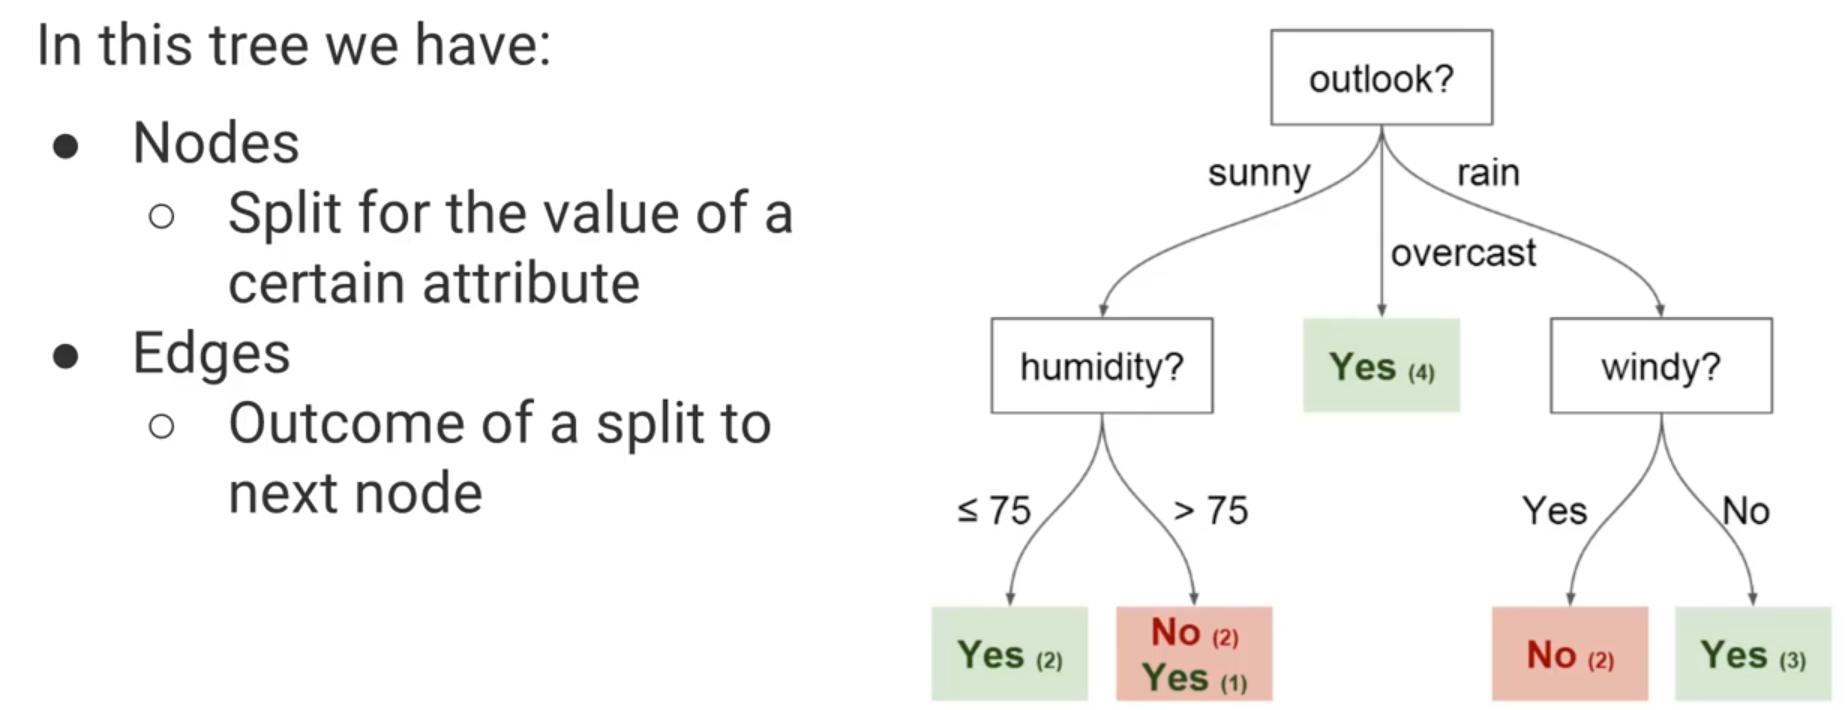

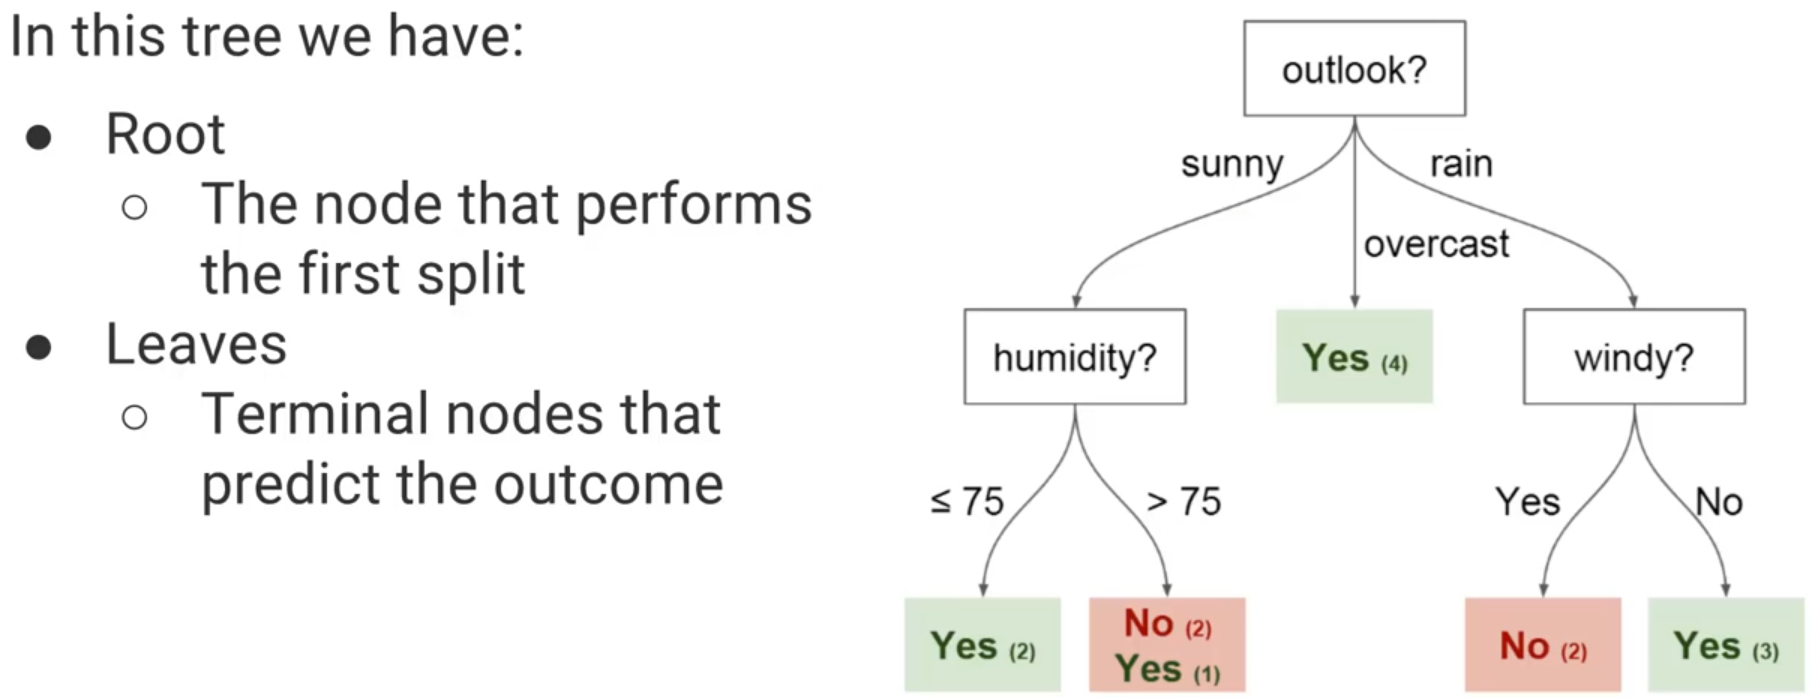
- the root node is "Outlook?", and that eventually splits into "Humidity?" and "Windy?"
- Leaves are "Yes" or "No"

There is a way to optimize where is the best place to "split"
- choose the features that best split your data, also known as maximizing your information gain off of the split

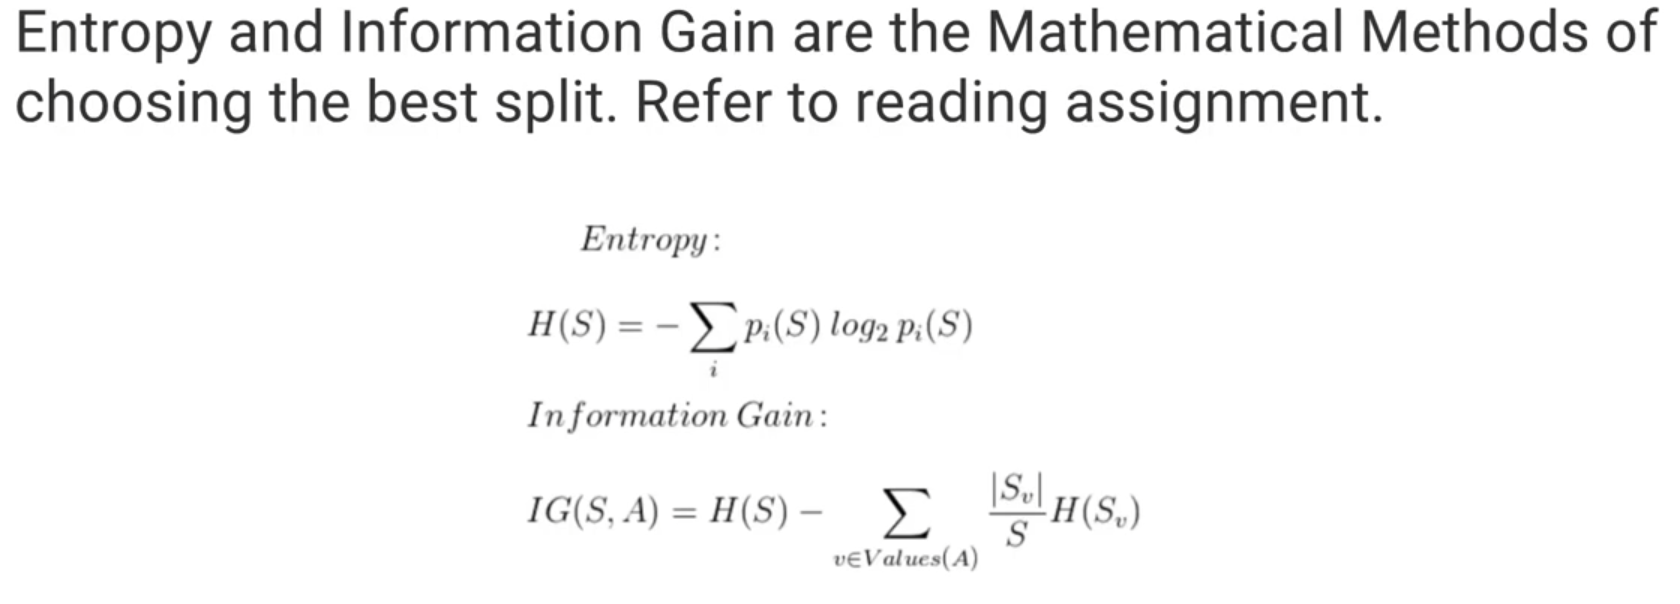

# Random Forest 

To improve performance, we can use many trees with a random sample of features chosen as the split
- a new random sample of features is chosen for every single tree at every single split
- for classification, "m" is typically chosen to be the square root of "p"

Can use Random Forest is a slight variation these bagged trees to reduce variance and better performance
- random forest creates an ensemble of decision trees using bootstrapped samples of the training set (just means sampling from training set with replacement)
- when we're building each tree, each time a split is considered, a random sample of "m"-features is chosen as a split candidate from the full set of "p"-features, the split is only allowed to use one of those "m" features
    - a new random sample of features is chosen for every single tree for every single tree
- ALSO NOTE: we don't need to change variable values that are strings into one-hot encodings or numerical values because random forest is actually good at processing strings compared to traditional regression algorithms like (linear regression, logistic regression, etc.) 
    - this is because random forests inherently perform feature splitting based on information gain or Gini impurity (which allows them to handle categorical variables without requiring one-hot encoding or other preprocessing steps. 
    
Supposed there is one very strong feature in the dataset for predicting dataset, when we used bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are highly correlated (want to avoid).
- average highly correlated quantities does not significantly reduce variance

By randomly leaving out candidate features from each split, Random Forest "decorrelates" the trees (meaning they are making the trees independent of each other), such that the averaging process can reduce the variance of the resulting model. So we won't be affected by features that really strongly predict the class data

`RandomForestClassifier` will have an `n_estimators` hyperparameter where n_estimators represent the number of decision trees used in the forest. Each tree is trained independently on a random subset of the training data (with replacement), using a technique called "Bootstrap Aggregation" ("Bagging"). The final prediction is made by aggregating the predictions of all the individual trees (i.e. by averaging for regression or by voting for classification). 
- having more trees in the forest generally improves the perforamnce of the model up to a certain point
- adding more trees can increase model's ability to generalize to new data, and make more accurate predictions, reducing overfitting, however, beyond a certain number of tees, the performance improvement may plateau, adding more trees does not provide significant additional benefit while increasing compute cost


Cons: 
- decision trees typically don't have the best accuracy or best predictor due to high variance
    - different splits in the training data can lead to different trees
    - bagging (bagging = bootstrap aggregating) is a general procedure to reduce variance in ML method (discussed in chapter 8 of the textbook)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [3]:
# kyphosis is a medical spine condition and we want to know if the corrective surgery was successful or not

df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

# the dataset represents patients that had kyphosis and dataframe represents whether kyphosis was absent or present after
# operation

# age is age in months (of children), the number is # of vertebrae involved in the operation, start is top-most vertebrae
# operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

# only 81 entries, small dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

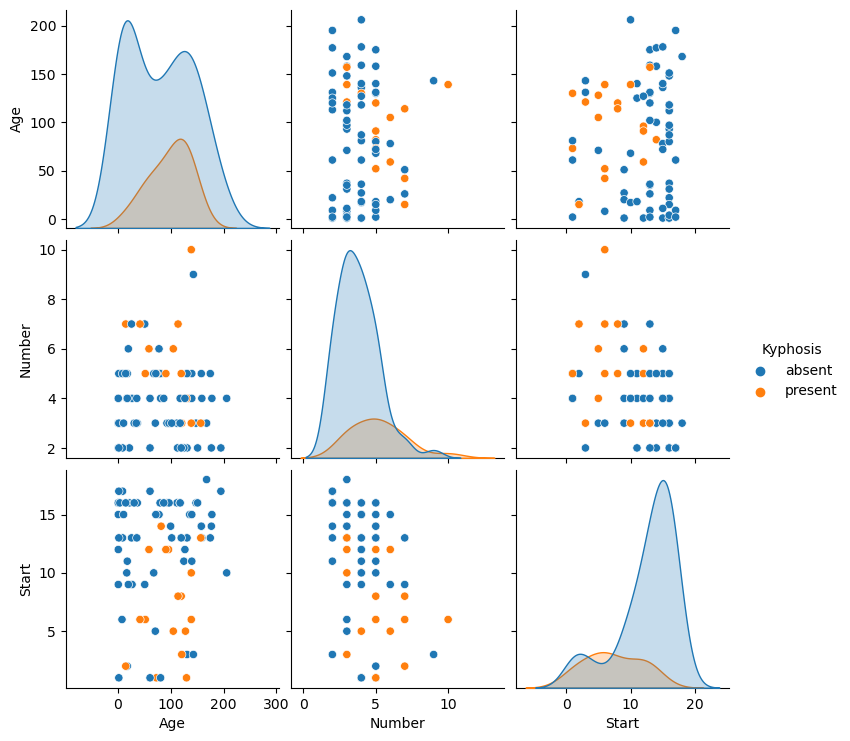

In [8]:
sns.pairplot(df,hue='Kyphosis')

## Train Test Split


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis',axis=1)
# Kyphosis is our target variable, so we want everything except the target

y = df['Kyphosis']

# we don't have to turn the values in the dataframes from strings into numerical values because Random Forest algorithms 
# process categorical (string) variables well

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Decision Trees

We'll start just by training a single decision tree
- `DecisionTreeClassifier` is used for classification problems

In [22]:
from sklearn.tree import DecisionTreeClassifier 

In [23]:
# instantiate it 

dtree = DecisionTreeClassifier()

# and fit it to the data X_train, y_train

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
# these are the various parameters (default ones are fine)

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [25]:
# create predictions and evaluate it

decision_tree_prediction = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,decision_tree_prediction))
print('\n')
print(confusion_matrix(y_test,decision_tree_prediction))

              precision    recall  f1-score   support

      absent       0.95      0.91      0.93        22
     present       0.50      0.67      0.57         3

    accuracy                           0.88        25
   macro avg       0.73      0.79      0.75        25
weighted avg       0.90      0.88      0.89        25



[[20  2]
 [ 1  2]]



Conclusion: it's not a terrible prediction, but we can compare this to a `RandomForest` model and see how that performs


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# the reason why RandomForest is under ".ensemble" instead of ".tree" is because RandomForest is an ensemble of decision trees
# instantiate the model

rfc = RandomForestClassifier(n_estimators=200)

# n_estimators parameter represents the number of decision trees that will be used in the forest
# 200 is probably overkill for our dataset, but it's not that computationally intensive yet

In [33]:
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_test)

In [34]:
print(classification_report(y_test,rfc_predictions))
print('\n')
print(confusion_matrix(y_test,rfc_predictions))

# it's a little hard to tell what performed better, it'll really come down to what you value (precision vs. recall) and if you
# value "present" or "absent" more -- it's probably more important to know if kyphosis is still present

# for the confusion matrix, we see 1 and 2 being mislabelled when the DecisionTreeClassifier mislabelled 2 and 1
# as the dataset gets larger and larger, the RandomForestClassifier will almost always perform better than a single decision
# tree, since our dataset is so small, the RandomForest wasn't able to outshine DecisionTree

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        22
     present       0.50      0.33      0.40         3

    accuracy                           0.88        25
   macro avg       0.71      0.64      0.67        25
weighted avg       0.86      0.88      0.87        25



[[21  1]
 [ 2  1]]


In [36]:
df['Kyphosis'].value_counts()

# we see that there are way more cases of it being absent than present, labelled dataset is really imbalanced
# this will affect models as we go on 

absent     64
present    17
Name: Kyphosis, dtype: int64

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [33]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

# RandomForest is much harder to visualize than sklearn because you'll have hundreds of decision trees instead of just one 
# like below

# 'pydot' library does not come standard in an anoconda distribution so we'll need to install

['Age', 'Number', 'Start']

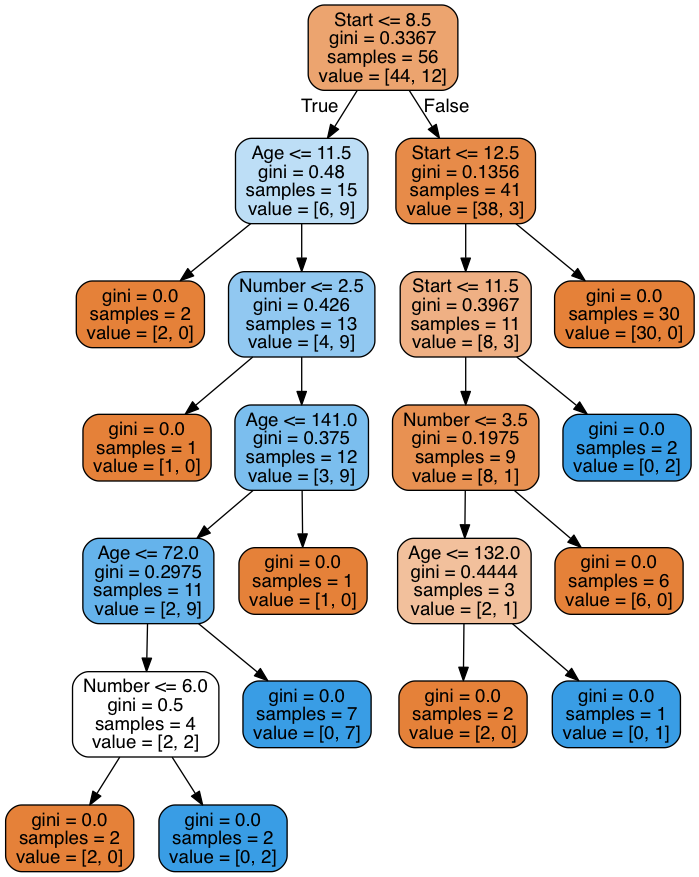

In [39]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  # this line will need the graphviz library from graphviz.org (separate from python)